<a href="https://colab.research.google.com/github/santifs/biomechatronics/blob/master/Kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alumno: Santiago Fernández Scagliusi

# Cinemática (Práctica 1)

*Este documento es un cuaderno de jupyter/colab que representa el enunciado de la práctica 1.*

*El alumno debe leer el enunciado, analizar cada parte (¿qué hace y por qué lo hace?) y rellenar los campos vacíos identificados bajo los epígrafes en rojo.*

*Algunas tareas son cuestiones avanzadas que sólo pueden ser contestadas si se tiene una idea clara del problema tratado y con conocimiento de python suficiente. Es posible entregar el trabajo sin haber respondido a todas las preguntas propuestas.* 

*Se recuerda que está prohibido copiar las respuestas entre alumnos así como publicar enunciados o soluciones en foros. Recomendándose que las respuestas estén ampliamente justificadas para evitar coicidencias en las mismas.*

*Una vez rellenado y ejecutado todos los campos, se deberá subir a la plataforma de enseñanza virtual el fichero ipynb completo, una copia en PDF (usando la opción de imprimir a archivo), y responder (si lo hubiera) a las preguntas presentes según las instrucciones presentes en el formulario de entrega que se habilitará al efecto.*

*Recuerde ejecutar cada celda para poder ver sus resultados (o cargar sus variables)*

En este cuaderno se va a trabajar con la cinemática de unos brazos articulados. 

El primer paso es importar las funciones de las librerías que nos van a ayudar en nuestras funciones.

In [ ]:
import numpy as np
%matplotlib inline


## Definición de la matriz dh

### <font color='red'>Escriba en la siguiente celda la función que define una matriz dh. Llame a esa función `dh`. No se le olvide ejecutar la celda para que la definición se cargue</font>

In [ ]:
def dh(angulo:float,dx:float,dy:float):
  return np.array([[np.cos(angulo), -np.sin(angulo), dx],
                   [ np.sin(angulo), np.cos(angulo),dy],
                   [ 0, 0, 1]])

Verificación de que se ha definido correctamente la matriz dh. Ejecute la siguiente celda. Su resultado debe ser: 

`array([0.44321265, 0.67302333, 1.        ])`

In [ ]:
theta1 = np.deg2rad(30)
theta2 = np.deg2rad(45)
theta3 = np.deg2rad(40)

t1 = dh(theta1,0,0)
t2 = dh(theta2,0.45,0)
t3 = dh(theta3,0.37,0)

t1@t2@t3 @ [0.1,0.,1]


array([0.44321265, 0.67302333, 1.        ])

## Cinemática inversa

La cinemática inversa es un problema de optimización (búsqueda de un mínimo). Para poder abordarlo, importamos las funciones de optimización de `scipy` de python. Además importamos la librería `matplotlib` que nos permitirá realizar gráficos.

In [ ]:
import scipy.optimize 
import matplotlib.pyplot as plt

El proceso de optimización pasa por un crear una función (tarea de la que se encarga `loss_generator`) cuyo valor tienda a cero cuanto más cerca estemos de el valor deseado. Dado que no tenemos una función de cinemática inversa analítica, lo que hacermos es para cada conjuntos de ángulos th1, th2, th3 calculamos la posición mediante cinemática directa y luego calculamos cómo de lejos hemos quedado de nuestro objetivo.

In [ ]:
def loss_generator(posicion, angulo=0):
    def f(x):
        th1 = x[0]        # Obtiene angulos a partir de x
        th2 = x[1]
        th3 = x[2]
    
        t1 = dh(th1,0,0)     # Calcula matrices DH de cada articulación
        t2 = dh(th2,0.45,0)
        t3 = dh(th3,0.37,0)

        output = (t1@t2@t3@[0.1,0.,1]) - np.array([posicion[0],posicion[1],1])  # Diferencia entre actual y objetivo. En [3] tenemos un 0
        output =  output + np.array([0,0, th1+th2+th3 - angulo])  # Output contiene diferencia de x, y, angulo
    
        return output
    return f
    

La función `articulaciones` nos permite calcular la posición de cada articulación para poder pintarla más adelante.

In [ ]:
def articulaciones(sol):
    x = np.array([0.])
    y = np.array([0.])

    t12 = dh(sol[0],0.,0.)@dh(sol[1],0.45,0)
    x = np.append(x,t12[0,2])   # Primera fila, tercera columna = dx
    y = np.append(y,t12[1,2])   # Segunda fila, tercera columna = dy

    t123 = t12@dh(sol[2],0.37,0.)
    x = np.append(x,t123[0,2])
    y = np.append(y,t123[1,2])

    pos = t123@[0.1,0.,1]
    x = np.append(x,pos[0])
    y = np.append(y,pos[1])
    
    return x,y

En la siguiente celda se calcula la cinemática inversa para la posición (0.5, 0.6) y 90º en la aproximación del último eslabón.

Ángulos en grados: [ 72.28282764 -61.16543214  78.8826045 ]


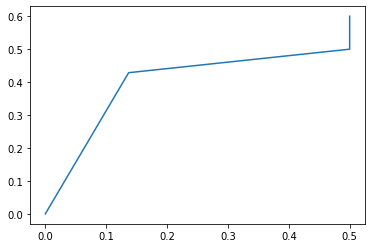

In [ ]:
loss = loss_generator([0.5,0.60], np.deg2rad(90))
sol = scipy.optimize.fsolve(loss,[np.deg2rad(0),np.deg2rad(0),np.deg2rad(0)])
print('Ángulos en grados:',(sol*180/np.pi+180)%360-180)
x,y=articulaciones(sol)
plt.plot(x,y)

## Tareas:

### <font color='red'>Calcule los ángulos que llevan el extremo de la prótesis a la coordenada [0.5,0.5] con un ángulo de aproximación de 30 grados</font>


Ángulos en grados: [ 10.38994156  84.14020763 -64.53014919]


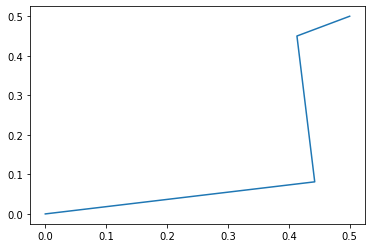

In [ ]:
loss = loss_generator([0.5,0.5], np.deg2rad(30))
sol = scipy.optimize.fsolve(loss,[np.deg2rad(0),np.deg2rad(0),np.deg2rad(0)])
print('Ángulos en grados:',(sol*180/np.pi+180)%360-180)
x,y=articulaciones(sol)
plt.plot(x,y)

<font color='red'>Escribir aquí una explicación de lo hecho</font>

Primero, se le pasan a loss_generator los valores deseados de coordenadas y ángulo de aproximación, de forma que se calcula la diferencia entre los valores actuales y los objetivos.

A continuación, se obtiene la solución de los ángulos mediante la reducción al mínimo de la diferencia mencionada anteriormente.
Esta solución se pasa a grados y se imprime por pantalla.

Finalmente, con la función "articulaciones" se obtienen los 4 puntos de cada eje (x, y) que se representan en la gráfica y que forman la solución del problema cinemático inverso

### <font color='red'>¿Qué ocurre si intentamos acceder a la posición [5,0.5]? </font>


Ángulos en grados: [0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


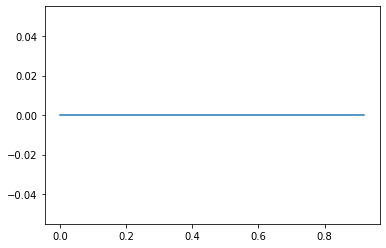

In [ ]:
loss = loss_generator([5,0.5], np.deg2rad(30))
sol = scipy.optimize.fsolve(loss,[np.deg2rad(0),np.deg2rad(0),np.deg2rad(0)])
print('Ángulos en grados:',(sol*180/np.pi+180)%360-180)
x,y=articulaciones(sol)
plt.plot(x,y)

<font color='red'>Interpreta el resultado</font>

Al principio del programa, al crear las matrices t1, t2, y t3, se ha definido la longitud de las barras: 0.45, 0.37, 0.1, por tanto, es imposible llegar a una posición más allá de 0.92 en el eje X

### <font color='red'>Supongase una articulación que no gira, sino que varía su longitud (un cilindro) Modifique el sistema para que considere esa posibilidad en la segunda articulación.</font>

In [29]:
def loss_generator2(posicion, angulo=0):
    def f(x):
        th1 = x[0]        # Obtiene angulos a partir de x
        th2 = 0
        th3 = x[2]
    
        t1 = dh(th1,0,0)     # Calcula matrices DH de cada articulación
        t2 = dh(0,x[1],0)
        t3 = dh(th3,0.37,0)

        output = (t1@t2@t3@[0.1,0.,1]) - np.array([posicion[0],posicion[1],1])  # Diferencia entre actual y objetivo. En [3] tenemos un 0
        output =  output + np.array([0,0, th1+th2+th3 - angulo])  # Output contiene diferencia de x, y, angulo
    
        return output
    return f

In [30]:
def articulaciones2(sol):
    sol[1] = np.clip(sol[1], 0, 0.45)
    x = np.array([0.])
    y = np.array([0.])

    t12 = dh(sol[0],0.,0.)@dh(0,sol[1],0)
    x = np.append(x,t12[0,2])   # Primera fila, tercera columna = dx
    y = np.append(y,t12[1,2])   # Segunda fila, tercera columna = dy

    t123 = t12@dh(sol[2],0.37,0.)
    x = np.append(x,t123[0,2])
    y = np.append(y,t123[1,2])

    pos = t123@[0.1,0.,1]
    x = np.append(x,pos[0])
    y = np.append(y,pos[1])
    
    return x,y

Ángulos en grados: [ 46.12531087  54.30924578 -16.12531087]


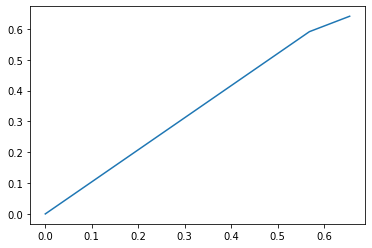

In [33]:
loss = loss_generator2([1,1], np.deg2rad(30))
sol = scipy.optimize.fsolve(loss,[np.deg2rad(0),np.deg2rad(0),np.deg2rad(0)])
print('Ángulos en grados:',(sol*180/np.pi+180)%360-180)
x,y=articulaciones2(sol)
plt.plot(x,y)

<font color='red'>Escribir aquí una explicación de lo hecho</font>

En primer lugar, se cambia la función "loss_generator2" para imponer th2 = 0, así esta articulación no rota y se mantiene alineada con la anterior (par cilíndrico). Además, en t2 se cambian los datos que se envían a la matriz dh, de forma que la incógnita ahora es la posición en el eje X en vez de ser el ángulo. Es decir, x[1] se pasa como segundo argumento.

Por otro lado, en la función "articulaciones2" se limita el valor de sol[1] al rango 0 - 0.45 mediante np.clip (si no la barra tendría longitud infinita). Por último, en t12 se cambian nuevamente los argumentos de dh, pasando ángulo 0 y posición en eje X como valor variable.

### <font color='red'>Añádase una articulación extra, e impongase que el ángulo th1 sea igual a th2.</font>

In [77]:
def loss_generator3(posicion, angulo=0):
    def f(x):
        th2 = x[0]
        th1 = th2        # Obtiene angulos a partir de x
        th3 = x[1]
        th4 = x[2]
    
        t1 = dh(th1,0,0)     # Calcula matrices DH de cada articulación
        t2 = dh(th2,0.45,0)
        t3 = dh(th3,0.37,0)
        t4 = dh(th4,0.5,0)

        output = (t1@t2@t3@t4@[0.1,0.,1]) - np.array([posicion[0],posicion[1],1])  # Diferencia entre actual y objetivo. En [3] tenemos un 0
        output =  output + np.array([0,0, th1+th2+th3+th4 - angulo])  # Output contiene diferencia de x, y, angulo
    
        return output
    return f

In [82]:
def articulaciones3(sol):
    x = np.array([0.])
    y = np.array([0.])

    t12 = dh(sol[0],0.,0.)@dh(sol[0],0.45,0)
    x = np.append(x,t12[0,2])   # Primera fila, tercera columna = dx
    y = np.append(y,t12[1,2])   # Segunda fila, tercera columna = dy

    t123 = t12@dh(sol[1],0.37,0.)
    x = np.append(x,t123[0,2])
    y = np.append(y,t123[1,2])

    t1234 = t123@dh(sol[2],0.5,0.)
    x = np.append(x,t1234[0,2])
    y = np.append(y,t1234[1,2])

    pos = t1234@[0.1,0.,1]
    x = np.append(x,pos[0])
    y = np.append(y,pos[1])
    
    return x,y

Ángulos en grados: [  55.74213924 -119.09516166   37.61088318]


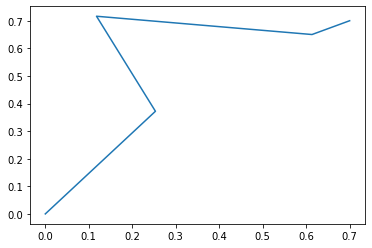

In [83]:
loss = loss_generator3([0.7,0.7], np.deg2rad(30))
sol = scipy.optimize.fsolve(loss,[np.deg2rad(0),np.deg2rad(0),np.deg2rad(0)])
print('Ángulos en grados:',(sol*180/np.pi+180)%360-180)
x,y=articulaciones3(sol)
plt.plot(x,y)

<font color='red'>Escribir aquí una explicación de lo hecho</font>

Simplemente se creó un ángulo th4 con su respectiva matriz t4 en la función "loss_generator3" (con una longitud de barra arbitraria de 0.5), además de imponer que th1 = th2.
Por otro lado, los valores que toma cada ángulo se han "desplazado" con respecto a las soluciones anteriores (es decir, th2 ahora toma x[0], th3 toma x[1]...)

Por último en la función "articulaciones3" se ha añadido el cálculo correspondiente a esta nueva articulación.

<font color='red'>¿Por qué es necesaria añadir una condición adicional si se incorpora una articulación extra?</font>



La función fsolve requiere que el argumento de entrada sea del mismo tamaño que el de salida. El problema es que ahora tenemos 4 ángulos distintos, para 3 valores de salida (diferencia de coordenadas y ángulo), por tanto, fsolve devuelve un error de "mismatch" en la función "f" de "loss_generator3".

Imponiendo la igualdad de th1 y th2 se resuelve este conflicto, ya que se vuelven a usar únicamente 3 ángulos.

### <font color='red'>Considere que una articulación tiene un ángulo de giro limitado (expresado como la posición angular máxima y la mínima a la que puede acceder). Impleméntese todos los cambios necesarios para que se pueda efectuar los cálculo expresados de cinemática directa e inversa.</font>

In [149]:
def loss_generator4(posicion, angulo=0):
    def f(x):
        x[0] = np.clip(x[0], 0, 0.4)
        th1 = x[0]        # Obtiene angulos a partir de x
        th2 = x[1]
        th3 = x[2]
    
        t1 = dh(th1,0,0)     # Calcula matrices DH de cada articulación
        t2 = dh(th2,0.45,0)
        t3 = dh(th3,0.37,0)

        output = (t1@t2@t3@[0.1,0.,1]) - np.array([posicion[0],posicion[1],1])  # Diferencia entre actual y objetivo. En [3] tenemos un 0
        output =  output + np.array([0,0, th1+th2+th3 - angulo])  # Output contiene diferencia de x, y, angulo
    
        return output
    return f

In [150]:
def articulaciones4(sol):
    #sol[0] = np.clip(sol[0], 0, 0.4)
    x = np.array([0.])
    y = np.array([0.])

    t12 = dh(sol[0],0.,0.)@dh(sol[1],0.45,0)
    x = np.append(x,t12[0,2])   # Primera fila, tercera columna = dx
    y = np.append(y,t12[1,2])   # Segunda fila, tercera columna = dy

    t123 = t12@dh(sol[2],0.37,0.)
    x = np.append(x,t123[0,2])
    y = np.append(y,t123[1,2])

    pos = t123@[0.1,0.,1]
    x = np.append(x,pos[0])
    y = np.append(y,pos[1])
    
    return x,y

Ángulos en grados: [  22.91831181  113.03391117 -105.61317254]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


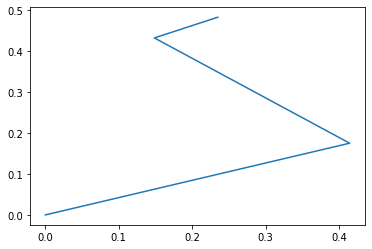

In [151]:
loss = loss_generator4([0.2,0.5], np.deg2rad(30))
sol = scipy.optimize.fsolve(loss,[np.deg2rad(0),np.deg2rad(0),np.deg2rad(0)])
print('Ángulos en grados:',(sol*180/np.pi+180)%360-180)
x,y=articulaciones4(sol)
plt.plot(x,y)

<font color='red'>Escribir aquí una explicación de lo hecho</font>

En este caso, lo importante es el uso de la función "np.clip" que limita el valor del ángulo x[0] a un rango específico (por ejemplo, entre 0 y 0.4 radianes).